# <div style = 'background-color:#616150'> <center><font color='#8FAD88'>Machine Learning aplicado al analisis de datos bancarios para determinar la aprobacion o rechazo de creditos</div>
---

#### En este notebook se aplica Machine Learning al análisis de datos bancarios para predecir la aprobación o rechazo de créditos. Se utilizan variables financieras y demográficas de los clientes para entrenar modelos predictivos, comparar su desempeño y evaluar su capacidad para identificar perfiles de alto riesgo. El objetivo es mostrar cómo estas técnicas pueden mejorar la eficiencia y precisión en la gestión crediticia.

#### Indice

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Preparación y limpieza de los datos](#0)<br>
2.  [Analisis exploratorio de los datos](#1)<br>
3.  [Modelado y evaluación](#2) <br>
4.  [Concluciones](#3) <br>

</div>

## <div style = 'background-color:black'> <center><font color='white'>① Preparación y limpieza de los datos </font></div> <a id="0"></a>

In [1]:
import warnings
warnings.filterwarnings("ignore") # Filtrar avisos

import pandas as pd
import numpy as np
import seaborn as sns # Librerias de graficos
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("loan_data.csv")
df.sample(5)

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
15807,I need financial help to pay off my high-inter...,44325,785,1011,56.96,employed,Rejected
4591,I need financial support to pay for my son's f...,36774,826,12596,79.26,unemployed,Rejected
2999,I need money to invest in a franchise business...,66449,834,39172,26.84,unemployed,Rejected
11089,I want to start a mobile pet grooming service ...,74990,773,32309,31.48,unemployed,Rejected
3975,I need financial support for medical treatment...,145005,515,99248,21.64,employed,Rejected


In [3]:
# Por razones de simplicidad elimino esta columna.
df = df.drop(columns=['Text'])

In [4]:
# Cambio nombre de las columnas.
headers = ["Ingreso", "Score_Credito", "Monto_Deuda", "Deuda/Ingreso", "Empleo", "Credito"]
df.columns = headers

In [5]:
# Convierto los resultados de las últimas columnas a valores numéricos, ya que hay solo dos posibles resultados, 0 y 1 tanto
# si es para el valor "Aprobado" y "Rechazado" como con la otra columna donde los valores son "Empleado" y "Desempleado"
df.Credito = df.Credito.replace(['Rejected'], 0)
df.Credito = df.Credito.replace(['Approved'], 1)

df.Empleo = df.Empleo.replace(['unemployed'], 0)
df.Empleo = df.Empleo.replace(['employed'], 1)

In [6]:
df.sample(5)

,Ingreso,Score_Credito,Monto_Deuda,Deuda/Ingreso,Empleo,Credito
10494,28377,793,18708,126.37,1,0
17776,46697,402,32207,76.84,0,0
4749,24723,426,5912,47.17,0,0
9259,135516,325,5857,21.24,0,0
1589,129272,595,23365,25.71,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ingreso        24000 non-null  int64  
 1   Score_Credito  24000 non-null  int64  
 2   Monto_Deuda    24000 non-null  int64  
 3   Deuda/Ingreso  24000 non-null  float64
 4   Empleo         24000 non-null  int64  
 5   Credito        24000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.1 MB


In [8]:
df.describe()

,Ingreso,Score_Credito,Monto_Deuda,Deuda/Ingreso,Empleo,Credito
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833,34.719167,0.499708,0.163875
std,51729.677627,159.227621,34666.604785,32.322471,0.500010,0.370170
min,20001.000000,300.000000,1005.000000,2.530000,0.000000,0.000000
25%,65635.750000,437.000000,16212.000000,14.507500,0.000000,0.000000
50%,110464.000000,575.000000,35207.000000,24.860000,0.000000,0.000000
75%,155187.000000,715.000000,65622.750000,41.840000,1.000000,0.000000
max,200000.000000,850.000000,158834.000000,246.330000,1.000000,1.000000


In [9]:
df.isnull().sum() # Para ver cuantos valores nulos hay en cada campo.

Ingreso          0
Score_Credito    0
Monto_Deuda      0
Deuda/Ingreso    0
Empleo           0
Credito          0
dtype: int64

## <div style = 'background-color:black'> <center><font color='white'>② Analisis exploratorio de los datos (EDA) </font></div><a id="1"></a>

In [10]:
df.Empleo.value_counts()

Empleo
0    12007
1    11993
Name: count, dtype: int64

In [11]:
conteo = df.Empleo.value_counts()

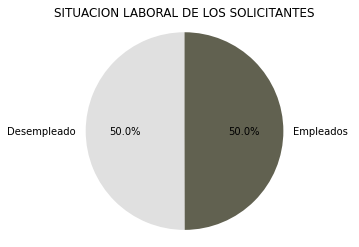

In [12]:
etiquetas = ['Empleados' if val == 1 else 'Desempleado' for val in conteo.index]

plt.pie(conteo, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#E0E0E0', '#616150'])
plt.title('SITUACION LABORAL DE LOS SOLICITANTES')
plt.axis('equal')  # Mantener forma de círculo

plt.show()

In [13]:
df.Credito.value_counts()

Credito
0    20067
1     3933
Name: count, dtype: int64

In [14]:
conteo = df.Credito.value_counts()

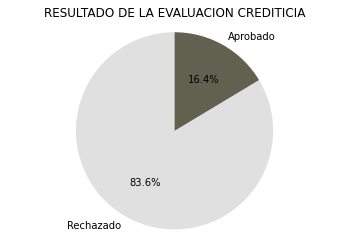

In [15]:
etiquetas = ['Aprobado' if val == 1 else 'Rechazado' for val in conteo.index]

plt.pie(conteo, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#E0E0E0', '#616150'])
plt.title('RESULTADO DE LA EVALUACION CREDITICIA')
plt.axis('equal')  # Mantener forma de círculo

plt.show()

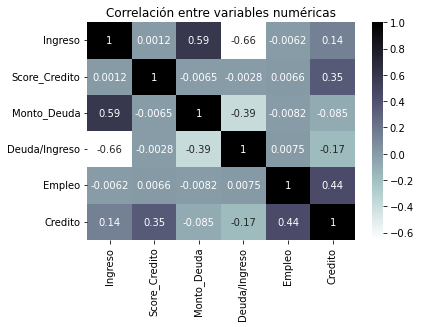

In [16]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='bone_r')
plt.title("Correlación entre variables numéricas")
plt.show()


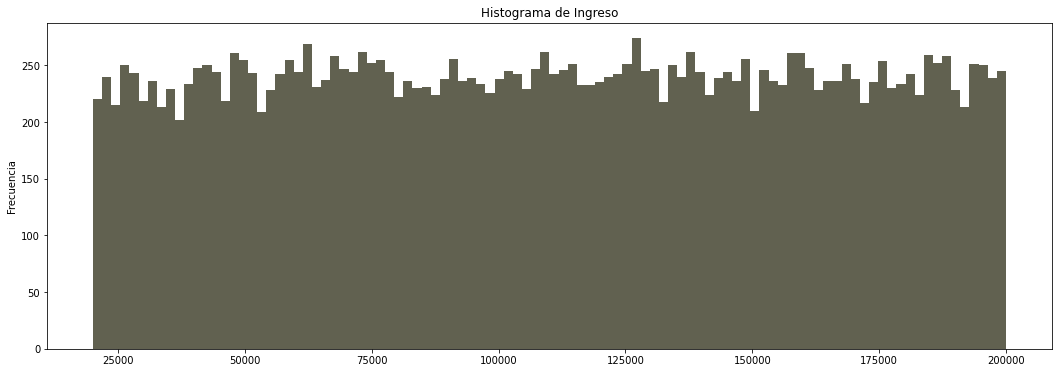

In [17]:
df["Ingreso"].hist(grid=False, bins=100, color="#616150", figsize=(18,6))
plt.title("Histograma de Ingreso")  
plt.ylabel("Frecuencia")           
plt.show()

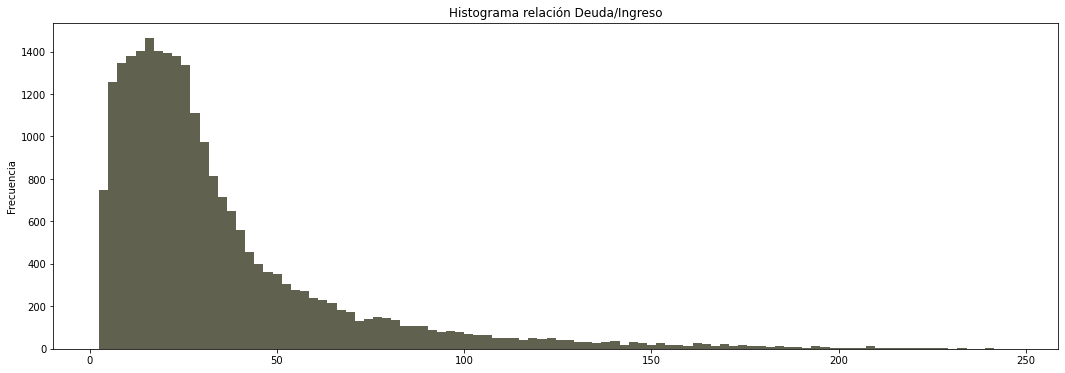

In [18]:
df["Deuda/Ingreso"].hist(grid=False, bins=100, color="#616150", figsize=(18,6))
plt.title("Histograma relación Deuda/Ingreso")  
plt.ylabel("Frecuencia")           
plt.show()

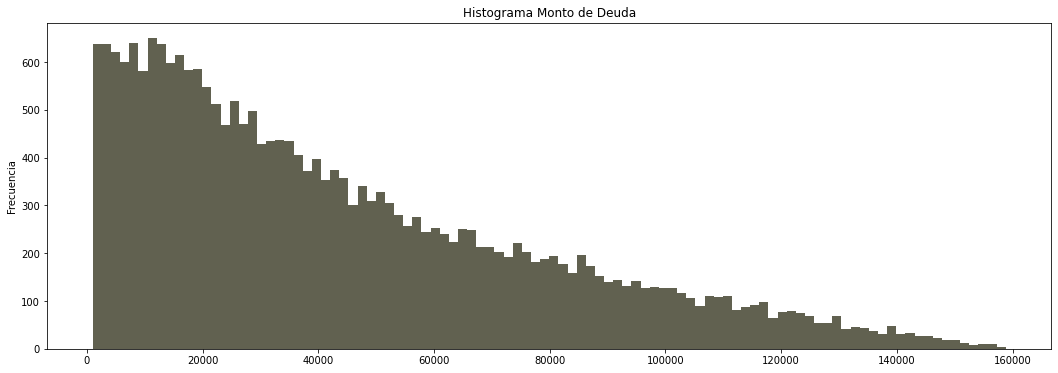

In [19]:
df["Monto_Deuda"].hist(grid=False, bins=100, color="#616150", figsize=(18,6))
plt.title("Histograma Monto de Deuda")  
plt.ylabel("Frecuencia")           
plt.show()

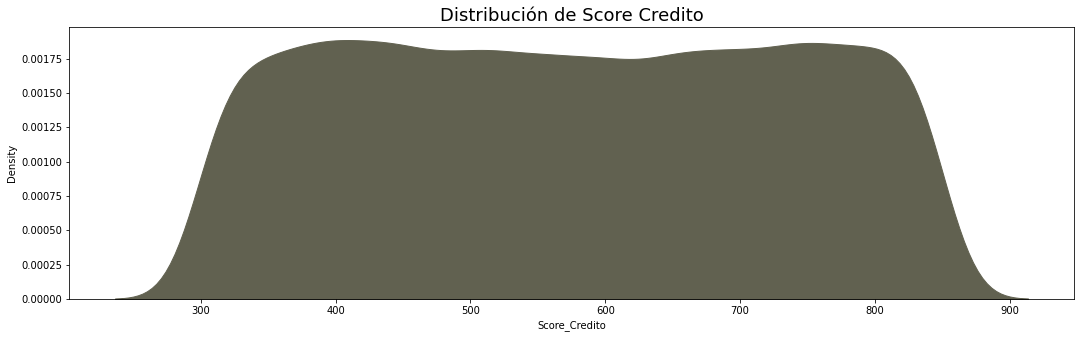

In [20]:
plt.figure(figsize=(18, 5))
sns.kdeplot(df['Score_Credito'], color='#616150', fill=True, alpha=1)
plt.title('Distribución de Score Credito', fontsize=18)
plt.grid(False)
plt.show()

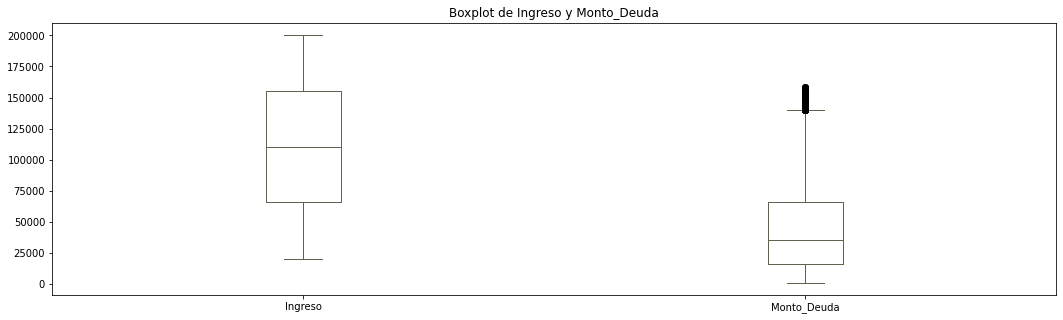

In [21]:
df[['Ingreso','Monto_Deuda']].plot(kind='box', figsize=(18,5),color='#616150')
plt.title("Boxplot de Ingreso y Monto_Deuda")
plt.show()

## <div style = 'background-color:Black'> <center><font color='white'>③ Modelado y evaluación </font></div><a id="2"></a>

## ❑ Regresión Logística

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [23]:
df.sample()

,Ingreso,Score_Credito,Monto_Deuda,Deuda/Ingreso,Empleo,Credito
8468,195469,849,8763,22.78,1,1


In [24]:
X = df[['Score_Credito']]  # variable independiente (predictora) por ahora uso 1 sola variable
y = df['Credito']          # variable dependiente (objetivo)

In [25]:
from sklearn.preprocessing import StandardScaler # Escalar valores para que todos tengan la misma importancia.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
modelo = LogisticRegression(class_weight='balanced')
modelo.fit(X_train, y_train)  # entrenar el modelo

LogisticRegression(class_weight='balanced')

In [28]:
y_pred = modelo.predict(X_test) # hacer que formule predicciones el modelo

In [29]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# La matriz es
#           Prediccion=0     Prediccion=1
#Real=0       TN (true neg)  FP (false posit)
#Real=1       FN (false neg) TP (true posit)

Matriz de confusión:
[[2672 1324]
 [ 215  589]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      3996
           1       0.31      0.73      0.43       804

    accuracy                           0.68      4800
   macro avg       0.62      0.70      0.60      4800
weighted avg       0.82      0.68      0.72      4800



<div class="alert alert-warning">El modelo predice mejor los rechazos que las aprobaciones. Los falsos positivos son riesgo de sobreaprobar clientes si se usara este modelo directamente. En resumen conservador para aprobaciones, pero necesita mejoras si se quiere confiar en las predicciones para aprobar créditos.
</div>

In [30]:
x_range = np.linspace(X['Score_Credito'].min(), X['Score_Credito'].max(), 300).reshape(-1, 1) # definir rango de valores

In [31]:
y_prob = modelo.predict_proba(x_range)[:, 1] # determinar la probabilidad que de 1.

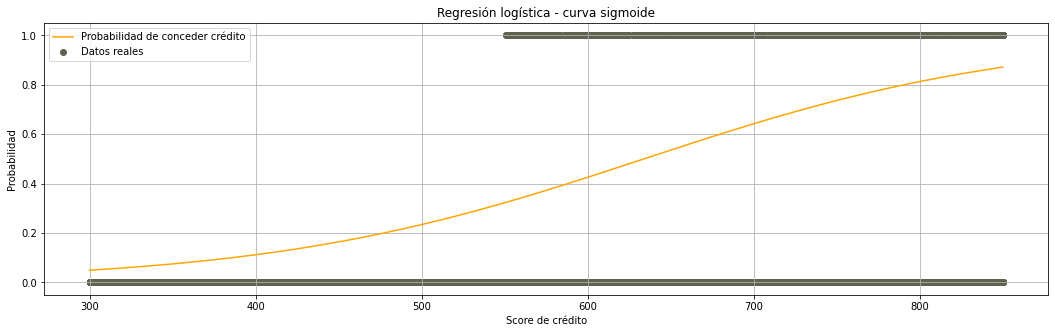

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))
plt.plot(x_range, y_prob, label='Probabilidad de conceder crédito', color='orange')
plt.scatter(X_test, y_test, color='#616150', label='Datos reales')
plt.xlabel('Score de crédito')
plt.ylabel('Probabilidad')
plt.title('Regresión logística - curva sigmoide')
plt.grid(True)
plt.legend()
plt.show()

Todo este calculo fue con una sola variable, ahora hago lo mismo con todas las que pueda para mejorar la capacidad de prediccion del modelo.

In [33]:
X = df[['Score_Credito', 'Ingreso', 'Monto_Deuda', 'Deuda/Ingreso', 'Empleo' ]]  # variable independiente (predictora) por ahora uso 1 sola variable
y = df['Credito']          # variable dependiente (objetivo)

In [34]:
from sklearn.preprocessing import StandardScaler # Escalar valores para que todos tengan la misma importancia.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
modelo = LogisticRegression(class_weight='balanced')
modelo.fit(X_train, y_train)  # entrenar el modelo

LogisticRegression(class_weight='balanced')

In [37]:
y_pred = modelo.predict(X_test) # hacer que formule predicciones el modelo

In [38]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[3294  702]
 [  51  753]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90      3996
           1       0.52      0.94      0.67       804

    accuracy                           0.84      4800
   macro avg       0.75      0.88      0.78      4800
weighted avg       0.91      0.84      0.86      4800



<div class="alert alert-warning">Mejoró la capacidad del modelo para detectar clientes aprobados: recall de clase 1 sube de 0.73 a 0.94. Detecta casi todos los clientes aprobados correctamente, reduciendo pérdidas por errores de predicción.</div>



## <div style = 'background-color:black'> <center><font color='white'>④ Conclusiones </font></div><a id="3"></a>

In [39]:
coef = pd.DataFrame({
    'feature': X_train.columns,
    'coef': modelo.coef_[0]
}).sort_values(by='coef', key=abs, ascending=False)

coef


,feature,coef
4,Empleo,4.843141
3,Deuda/Ingreso,-0.110570
0,Score_Credito,0.005382
2,Monto_Deuda,-0.000031
1,Ingreso,-0.000015


- Tener empleo aumenta fuertemente la probabilidad de aprobar el crédito.
- A mayor ratio Deuda/Ingreso, menor probabilidad de aprobar.
- Muy positivo, aunque muy pequeño, los clientes con mejor score tienen más probabilidad de aprobación.
- El monto total de deuda reduce levemente la probabilidad de aprobar, pero el efecto es mínimo.

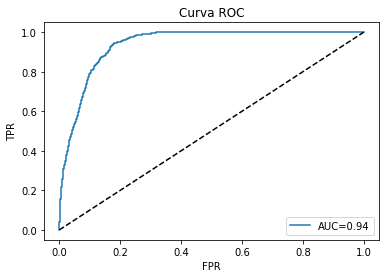

Mide capacidad del modelo para distinguir entre aprobados y rechazados.


In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = modelo.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC={auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()
print("Mide capacidad del modelo para distinguir entre aprobados y rechazados.")

## Validación cruzada (Cross-Validation)

La validación cruzada es una técnica para evaluar la capacidad de generalización del modelo, muestra cómo se comportará con datos que no ha visto. Sirve para detectar overfitting (cuando el modelo aprende demasiado los datos de entrenamiento y falla con datos nuevos).
- Divide los datos en k partes (folds).
- Entrena el modelo k veces: cada vez uno de los folds sirve como conjunto de prueba y los otros k-1 como entrenamiento.
- Se promedian las métricas (accuracy, f1, AUC) para obtener un valor más robusto.

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo, X, y, cv=5, scoring='roc_auc')
print("AUC promedio:", scores.mean())


AUC promedio: 0.9342335564161353


<div class="alert alert-warning">Significa que si tomo un cliente aprobado y uno rechazado al azar, el modelo asignará una probabilidad más alta al aprobado en el 93.4% de los casos.</div>

---
✍️ Autor: Néstor Díaz — Contador Público | Analista de Datos | Machine Learning

📅 Proyecto: Machine Learning aplicado a la retención de clientes bancarios: Predicción de abandono

---